**<font size="5" color="red">ch1. NLTK 자연어 처리 패키지</font>**
# 1.NLTK패키지
1. 텍스트 전처리 : 토큰화(어절, 문장 나누기), 정규표현식을 활요한 토큰화, 불용어 제거, 기본형(어근)추출
2. 품사태깅: 단어 품사식별
3. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감성분석 ... (단점)NLTK 속도가 느림


In [1]:
import nltk

In [2]:
#nltk.download()

In [3]:
# nltk.download('omw-1.4')
# c:/nltk_data
# d:/nltk_data
# e:/nltk_data
# c:/User/내컴퓨터이름/nltk_data
# c:/User/내컴퓨터이름/anaconda3/nltk_data
# c:/User/내컴퓨터이름/anaconda3/share/nltk_data
# c:/User/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/User/내컴퓨터이름/Appdata/Roaming/nltk_data

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

In [7]:
len(emma)

887071

In [8]:
# 문장단위로 쪼갠 list
from nltk.tokenize import sent_tokenize
sent_tokenize = sent_tokenize(emma)
print("첫문장: %r" %(sent_tokenize[0]))
print("두번째문장: %r" %(sent_tokenize[1]))
print("마지막문장: %r" %(sent_tokenize[-1]))

첫문장: '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'
두번째문장: "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."
마지막문장: 'FINIS'


In [9]:
# word_tokenize( ):  단어단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokenize[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [10]:
# RegexpTokenizer클래스 : 토큰화 할때 정규표현식 이용
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\w+')
words = ret.tokenize(sent_tokenize[0])
print(words)

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미있는 가장 작은 말의 단위) 분석
- 자연어처리의 기본은 형태소 분석과 품사 태깅
    * 어간추출(stemming),원형복원(lemmatizing),품사태깅

In [11]:
words =['sending','cooking','files','lives','crying','dying']
# (1) 어간 추출(1)
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]),pst.stem(words[2])

('send', 'cook', 'file')

In [12]:
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [13]:
# (2) 어간추출(2)
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [14]:
# 어간 추출방법3
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [15]:
# 어간을 추출할 경우 의미가 달라지는 경우 있어 원형 복원을 하기도 함
words2 = ['belives','cooking']
[lst.stem(word) for word in words2]

['bel', 'cook']

In [16]:
# 원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belives', 'cooking']

In [18]:
# 품사태깅 : sent_tokens[10]
from nltk.tag import pos_tag
words = word_tokenize(sent_tokenize[10])
tagged_list = pos_tag(words)
print('단어들:', words)
print('\n 품사태깅결과 :', tagged_list)

단어들: ['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']

 품사태깅결과 : [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


In [19]:
# 퀴즈 : emma 소설안에서
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 태깅을 하시오(RegexpTokenizer)
# 2. "Emma" 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오(NNP,...)
# 3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오


In [20]:
# 1
from nltk.tag import pos_tag
ret = RegexpTokenizer('\w\w\w+') #('[\w]{3,}')
words = ret.tokenize(emma)
tagged_list = pos_tag(words)
print('\n 품사태깅결과 :', tagged_list) 
tagged_list[:10]


 품사태깅결과 : [('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP'), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN'), ('and', 'CC'), ('rich', 'JJ'), ('with', 'IN'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), ('seemed', 'VBD'), ('unite', 'JJ'), ('some', 'DT'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('existence', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty', 'JJ'), ('one', 'CD'), ('years', 'NNS'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('distress', 'NN'), ('vex', 'IN'), ('her', 'PRP$'), ('She', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('youngest', 'JJS'), ('the', 'DT'), ('two', 'CD'), ('daughters', 'NNS'), ('most', 'RBS'), ('affectionate', 'JJ'), ('indulgent', 'NN'), ('father', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('consequence', 'NN'), ('her', 'PRP$'), ('sister', 

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN')]

In [21]:
# 2
import pandas as pd
df = pd.DataFrame(tagged_list)
display(len(df[df[0]=='Emma']))
display(df),df[1].value_counts().index

865

,0,1
0,Emma,NNP
1,Jane,NNP
2,Austen,NNP
3,1816,CD
4,VOLUME,NNP
...,...,...
123872,perfect,JJ
123873,happiness,NN
123874,the,DT
123875,union,NN


(None,
 Index(['NN', 'RB', 'JJ', 'VBD', 'NNP', 'DT', 'IN', 'PRP', 'CC', 'VB', 'VBN',
        'MD', 'PRP$', 'NNS', 'VBG', 'VBP', 'VBZ', 'WDT', 'WP', 'CD', 'WRB',
        'JJR', 'JJS', 'EX', 'RBR', 'RP', 'PDT', 'RBS', 'WP$', 'NNPS', 'UH',
        'FW'],
       dtype='object'))

In [23]:
# 3
df1=df[(df[1]=='NN')|(df[1]=='NNS')|(df[1]=='NNP')|(df[1]=='NNPS')]
print(len(df1[0]))
print(len(df1.groupby(0).value_counts()))
print(df1.groupby(0).value_counts().mean())

30781
4303
7.153381361840577


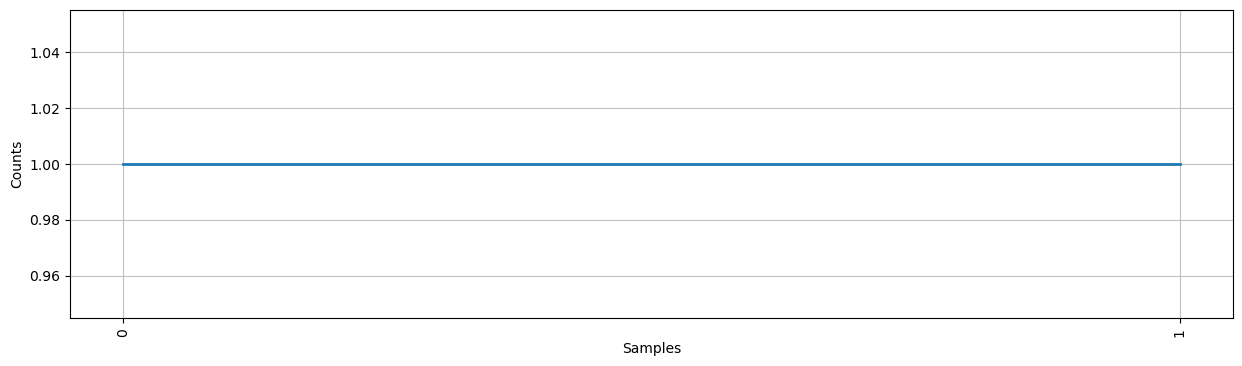

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
# 명사들 중 최빈 단어 시각화
import matplotlib.pyplot as plt
from nltk import Text
# Text : 단어 리스트와 빈도 분석에서 사용될 클래스
emma_text = Text(df1)
plt.figure(figsize=(15,4))
emma_text.plot(20)

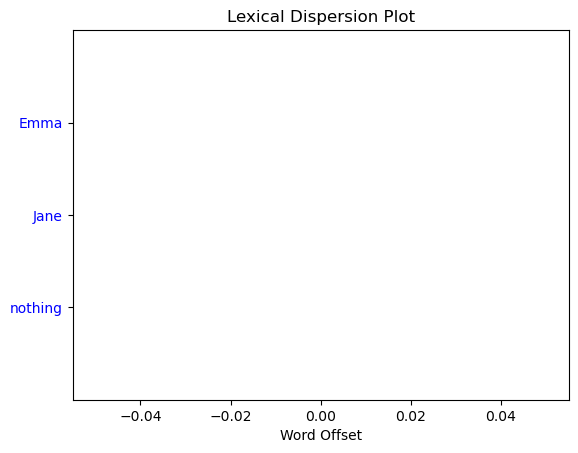

In [26]:
emma_text.dispersion_plot(['Emma','Jane','nothing'])

In [28]:
# emma에서 고유 명사(이름)  출현 빈도
name_list = [word for emma_tag in emma_tags if emma_tag[1]in ['NNP','NNPS']]

freq_dict= {}
for name in name_list:
    if name in freq_dict.keys():
        freq_dict['Emma']+=1
    else:
        freq_dict[name]=1
freq_dict

NameError: name 'emma_tags' is not defined

In [31]:
from nltk import FreqDist
FreqDist(name_list)

NameError: name 'name_list' is not defined

In [33]:
for name, freq in FreqDist(name_list).items():
    if freq>150:
        print(name,'_\-',freq)

NameError: name 'name_list' is not defined

In [35]:
#위의 내용을 정렬
dic = dict(FreqDist(name_list))
#dic = freq_dict
wordcnt = pd.Series(dic)

wordcnt.head(13)

NameError: name 'name_list' is not defined

In [36]:
wordcnt[wordcnt>150]

NameError: name 'wordcnt' is not defined